# Structural Reliability - Basics and Example
This is a very condensed introduction to a simple structural reliability problem.

## Context:
Structural reliability is defined as the complement of structural failure. Structural failure is defined as an event, where the load bearing capacity $R$ is smaller than the load effect $S$. Correspondingly, the failure probability is the defined as $P_F=\Pr(R\le S)=\Pr(R-S\le 0)$ and reliability as $\Pr(R-S>0)$.
In general, $R$ and $S$ are not certainly known and are mathematically represented as random variables. If it is assumed that $R$ and $S$ can be represented as independent normal distributed random variables, a safety margin $M=R-S$ can be introduced, which is as well normal distributed with mean value $\mu_M=\mu_R-\mu_S$ and standard deviation $\sigma_M=\sqrt{\sigma_R^2+\sigma_S^2}$. The failure probability can then computed as

$P_F=\Pr(R-S<0)=\Pr(M<0)=\Phi\left(\frac{0-\mu_M}{\sigma_M}\right)=\Phi\left(-\frac{\mu_R-\mu_S}{\sqrt{\sigma_R^2+\sigma_S^2}}\right)=\Phi\left(-\beta\right)$

where $\beta=\frac{\mu_R-\mu_S}{\sqrt{\sigma_R^2+\sigma_S^2}}$ is referred to as the *reliability index*.

## Example:
You have to design a beam that has to span $l=10$ m and has to carry a load $Q$ . The material that is available is glued laminated timber (Glulam) and the cross-section is specified to be rectangular with a width of $b =300$ mm and height $h$. The load is given in this project to be a uniform distributed load that is represented by its 50 years maximum value $Q$. The material property of interest in this case is the bending strength of the Glulam $F_{m}$ . The situation is illustrated in the following Figure.

![Simple Supported Beam](https://folk.ntnu.no/jochenk/img/l02_fig1.png)

The dominating effect ($S$) of the load $Q$ is the bending moment at mid-span, which is $Ql^{2}/8$. The elastic bending load bearing capacity of the rectangular cross-section $R$ is $F_{m}bh^{2}/6$.
Structural failure is defined as the event when the load on a structure is larger than its load bearing capacity. In other words, failure is characterized by the difference between the load bearing capacity and the load being negative. The corresponding limit state is general referred to as *Ultimate Limit State (ULS)* and for this example expressed as:

$g\left(R,S\right) = R-S = \left(\dfrac{bh^{2} }{6} \right)F_{m} -\left(\dfrac{l^{2} }{8} \right)Q\le 0$

The limit state equation contains different variables, some of them are uncertain or random, as $Q,F_m$, and represented as Normal distributed with mean value and coefficient of variation, $\mu_Q=24.1$ N/mm, $V_Q=0.3$, and, $\mu_{F_m}=24.1$ MPa, $V_{F_m}=0.15$. For a chosen $h=800$ mm, the reliability index and the corresponding failure probability are computed as:



In [6]:
## Packages and general settings

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
fontsizes=18
plt.rcParams.update({'font.size': fontsizes})
plt.rcParams.update({"font.family": "serif"})
plt.rcParams.update({"mathtext.fontset" : "cm"})
plt.rcParams.update({'font.serif': 'Times New Roman'})
plt.close('all')

In [7]:
## Input

# Geometry
l = 10000                          # [mm] span
b = 300                            # [mm] width

#==============================================================================
# Material properties
mu_fm = 26.6                       # [MPa] mean material resistance
cov_fm = 0.15                      # coeff. of variation
std_fm = mu_fm*cov_fm              # [MPa] standard deviation

mu_R = mu_fm*b/6
std_R = std_fm*b/6
#==============================================================================
# Load
mu_q = 24.1                        # [N/mm] mean load
cov_q = 0.3                        # coeff. of variation
std_q = mu_q*cov_q                 # [MPa] standard deviation

mu_S = (l**2/8)*mu_q
std_S = (l**2/8)*std_q

h1 = 800                        # in [mm]

## Computation

# Reliability index :
beta = (mu_R*h1**2-mu_S)/(((std_R*h1**2)**2+(std_S)**2)**0.5)

# Probability of failure :
PF = sp.stats.norm.cdf(-beta)

# Results: 
B1  = "Reliability Index Beta: {b:.2f} \n".format(b=beta)
P2 = "Probability of failure: {pf:.2e} \n".format(pf=PF)
print(B1)
print(P2)

Reliability Index Beta: 3.52 

Probability of failure: 2.19e-04 



We might be interested how the choice of $h$ affects the reliability index and the failure probability, say in the range of $h = [500,1500]$. 

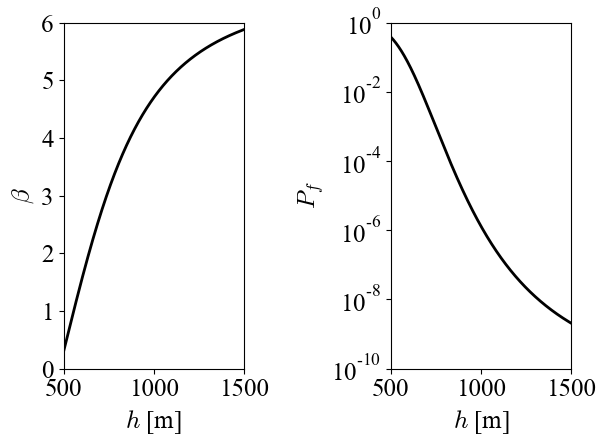

In [8]:
# Reliability index as a function of the decision variable
BETA = lambda h: (mu_R*h**2-mu_S)/(((std_R*h**2)**2+(std_S)**2)**0.5)
h1 = np.linspace(500,1500, num=10000)
beta = BETA(h1)
PF = sp.stats.norm.cdf(-beta)

# Plot settings
plt.figure()

plt.subplot(121)
plt.plot(h1,beta, color='black',lw=2)
plt.xlabel('$h$ [m]',fontsize=fontsizes)
plt.ylabel(r'$\beta$',fontsize=fontsizes)
plt.xlim(500,1500)
plt.ylim(0,6)


plt.subplot(122)
plt.plot(h1,PF, color='black',lw=2)
plt.yscale('log')
plt.xlabel('$h$ [m]',fontsize=fontsizes)
plt.ylabel('$P_f$',fontsize=fontsizes)
plt.xlim(500,1500)
plt.ylim(1e-10,1e0)
plt.tight_layout()
plt.show()

Let's see how the relation between $\beta$ and the decision parameter $h$ is influenced by the coefficient of variation of the load: 

In [9]:
from IPython.display import display, Markdown, clear_output
import json
import ipywidgets as widgets
import scipy as sp

slider_covq = widgets.FloatSlider(
         value=0.3,
         min=0,
         max=1.0,
         step=0.05,
         description='CoV load:',
         orientation='horizontal',
         readout=True,
         readout_format='2.2f',)

button = widgets.Button(description='Refresh plot')

out = widgets.Output()

# Plot settings
def plot_beta(ax,beta):
        PF = sp.stats.norm.cdf(-beta)
        
        ax[0].plot(h1,beta, color='black',lw=2)
        ax[0].set_xlabel('$h$ [m]')
        ax[0].set_ylabel(r'$\beta$')
        ax[0].set_xlim(500,1500)
        ax[0].set_ylim(0,6)
        
        ax[1].plot(h1,PF, color='black',lw=2)
        ax[1].set_yscale('log')
        ax[1].set_xlabel('$h$ [m]',fontsize=fontsizes)
        ax[1].set_ylabel('$P_f$',fontsize=fontsizes)
        ax[1].set_xlim(500,1500)
        ax[1].set_ylim(1e-10,1e0)
        plt.tight_layout()
        plt.show()

    
def on_button_clicked(b):
    with out:
        clear_output()
        std_q = mu_q*slider_covq.value                 # [MPa] standard deviation
        std_S = (l**2/8)*std_q
        
        BETA = lambda h: (mu_R*h**2-mu_S)/(((std_R*h**2)**2+(std_S)**2)**0.5)
        h1 = np.linspace(500,1500, num=10000)
        beta = BETA(h1)
        fig, ax1 = plt.subplots(1,2)
        plot_beta(ax1,beta)
        
button.on_click(on_button_clicked)
display(widgets.VBox([slider_covq,button,out]))

In [10]:
from IPython.display import display, Markdown, clear_output
from matplotlib.figure import figaspect
import json
import ipywidgets as widgets
import scipy as sp

slider_h = widgets.FloatSlider(
         value=1000,
         min=500,
         max=1500,
         step=0.05,
         description='$h$=',
         orientation='horizontal',
         readout=True,
         readout_format='2.2f',)

slider_covq = widgets.FloatSlider(
         value=0.3,
         min=0,
         max=1.0,
         step=0.05,
         description='CoV load:',
         orientation='horizontal',
         readout=True,
         readout_format='2.2f',)

button = widgets.Button(description='Refresh plot')

out = widgets.Output()

# Plot settings
        
def plot_margin(ax,h,std_S,Pf):
        
        S = np.linspace(mu_S-5*std_S,mu_S+5*std_S,100)
        R = np.linspace(mu_R*h**2-5*std_R*h**2,mu_R*h**2+5*std_R*h**2,100)
        std_M = np.sqrt(std_S**2+(std_R*h**2)**2)
        mu_M = mu_R*h**2-mu_S
        M1 = np.linspace(min(mu_M-5*std_M,-std_M),0,20)
        M2 = np.linspace(0.1,max(mu_M+5*std_M,std_M),80)
        M = np.concatenate((M1,M2))
        y_S = sp.stats.norm.pdf(S,mu_S,std_S)
        y_S /= np.trapz(y_S,S)
        y_R = sp.stats.norm.pdf(R,mu_R*h**2,std_R*h**2)
        y_R /=np.trapz(y_R,R)
        y_M = sp.stats.norm.pdf(M,mu_M,std_M)
        cte = np.trapz(y_M,M)
        y_M /= cte
        ax.plot(S,y_S, color='red',label = '$S$')
        ax.plot(R,y_R, color='blue',label = '$R$')
        ax.plot(M,y_M, color='black',label = '$M$')
        ax.fill_between(M1, 0, sp.stats.norm.pdf(M1,mu_M,std_M)/cte,color='red',alpha = 0.4)
        max_y = max(max(y_M),max(y_R),max(y_S))
        ax.plot(np.array([0,0]),np.array([0,max_y*1.1]),'--k')
        ax.set_xlabel('$S$,$R$,$M$')
        ax.set_ylabel('PDF')
        ax.set_xlim(min(-std_M,mu_M-3*std_M),max(mu_R*h**2+3*std_R*h**2,mu_S+3*std_S))
        ax.set_ylim(0,max_y*1.1)
        ax.set_xticks(np.array([0,mu_S,mu_M,mu_R*h**2]))
        ax.set_xticklabels(['0','$\mu_S$','$\mu_M$','$\mu_R$'])
        ax.set_yticks([])
        ax.text(0,0,'$P_f$ = {p:.2e}'.format(p=Pf),horizontalalignment='right',verticalalignment='top')
        ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
        plt.show()
        
def on_button_clicked(b):
    with out:
        clear_output()
        h = slider_h.value                 # [MPa] standard deviation
        std_q = mu_q*slider_covq.value
        std_S = (l**2/8)*std_q
        
        beta = (mu_R*h**2-mu_S)/(((std_R*h**2)**2+(std_S)**2)**0.5)
        Pf = sp.stats.norm.cdf(-beta)
        wp, hp = figaspect(1/3)
        fig, ax2 = plt.subplots(figsize=(wp,hp))
        plot_margin(ax2,h,std_S,Pf)
        
button.on_click(on_button_clicked)
display(widgets.VBox([slider_h,slider_covq,button,out]))